# A Novel Embedding Model for Knowledge Base Completion Based on Convolutional Neural Network

## Abstract

In this paper, we propose a novel embedding model, named ConvKB, for knowledge base completion. Our model ConvKB advances state-of-the-art models by employing a convolutional neural network, so that it can capture global relationships and transitional characteristics between entities and relations in knowledge bases. In ConvKB, each triple *(head entity, relation, tail entity)* is represented as a 3column matrix where each column vector represents a triple element. This 3-column matrix is then fed to a convolution layer where multiple filters are operated on the matrix to generate different feature maps. These feature maps are then concatenated into a single feature vector representing the input triple. The feature vector is multiplied with a weight vector via a dot product to return a score. This score is then used to predict whether the triple is valid or not. Experiments show that ConvKB achieves better link prediction performance than previous state-of-the-art embedding models on two benchmark datasets WN18RR and FB15k-237.

Trong bài báo này, chúng tôi đề xuất một mô hình nhúng mới, có tên ConvKB, để hoàn thành cơ sở tri thức. Mô hình ConvKB của chúng tôi cải tiến các mô hình tiên tiến bằng cách sử dụng mạng thần kinh tích chập, để nó có thể nắm bắt các mối quan hệ toàn cầu và các đặc điểm chuyển tiếp giữa các thực thể và quan hệ trong các cơ sở tri thức. Trong ConvKB, mỗi bộ ba (thực thể đầu, quan hệ, thực thể đuôi) được biểu diễn dưới dạng ma trận 3 cột trong đó mỗi vectơ cột biểu thị một phần tử ba. Ma trận 3 cột này sau đó được đưa đến một lớp chập trong đó nhiều bộ lọc được vận hành trên ma trận để tạo ra các bản đồ tính năng khác nhau. Các bản đồ tính năng này sau đó được nối vào một vectơ tính năng duy nhất đại diện cho bộ ba đầu vào. Vectơ đặc trưng được nhân với một vectơ trọng lượng thông qua một sản phẩm chấm để trả về điểm số. Điểm này sau đó được sử dụng để dự đoán liệu bộ ba có hợp lệ hay không. Các thử nghiệm cho thấy ConvKB đạt được hiệu suất dự đoán liên kết tốt hơn so với các mô hình nhúng tiên tiến trước đây trên hai bộ dữ liệu điểm chuẩn WN18RR và FB15k-237

## 1. Introduction

Large-scale knowledge bases (KBs), such as YAGO (Suchanek et al., 2007), Freebase (Bollacker et al., 2008) and DBpedia (Lehmann et al., 2015), are usually databases of triples representing the relationships between entities in the form of fact (head entity, relation, tail entity) denoted as (h, r, t), e.g., (Melbourne, cityOf, Australia). These KBs are useful resources in many applications such as semantic searching and ranking (Kasneci et al., 2008; Schuhmacher and Ponzetto, 2014; Xiong et al., 2017), question answering (Zhang et al., 2016; Hao et al., 2017) and machine reading (Yang and Mitchell, 2017). However, the KBs are still incomplete, i.e., missing a lot of valid triples (Socher et al., 2013; West et al., 2014). Therefore, much research work has been devoted towards knowledge base completion or link prediction to predict whether a triple (h, r, t) is valid or not (Bordes et al., 2011).

Các cơ sở tri thức quy mô lớn (KB), như YAGO (suchanek et al., 2007), Freebase (Bollacker et al., 2008) và DBpedia (Lehmann et al., 2015), thường là cơ sở dữ liệu của bộ ba đại diện cho các mối quan hệ giữa các thực thể ở dạng thực tế (thực thể đầu, quan hệ, thực thể đuôi) được ký hiệu là (h, r, t), ví dụ: (Melbourne, cityOf, Úc). Các KB này là tài nguyên hữu ích trong nhiều ứng dụng như tìm kiếm và xếp hạng ngữ nghĩa (Kasneci et al., 2008; Schuhmacher và Ponzetto, 2014; Xiong et al., 2017), trả lời câu hỏi (Zhang et al., 2016; Hao et al. , 2017) và đọc máy (Yang và Mitchell, 2017). Tuy nhiên, KB vẫn chưa hoàn thành, tức là, thiếu rất nhiều bộ ba hợp lệ (Socher et al., 2013; West et al., 2014). Do đó, nhiều công việc nghiên cứu đã được dành cho việc hoàn thành cơ sở tri thức hoặc dự đoán liên kết để dự đoán liệu một bộ ba (h, r, t) có hợp lệ hay không (Bordes et al., 2011).

Many embedding models have proposed to learn vector or matrix representations for entities and relations, obtaining state-of-the-art (SOTA) link prediction results (Nickel et al., 2016a). In these embedding models, valid triples obtain lower implausibility scores than invalid triples. Let us take the well-known embedding model TransE (Bordes et al., 2013) as an example. In TransE, entities and relations are represented by k-dimensional vector embeddings. TransE employs a transitional characteristic to model relationships between entities, in which it assumes that if $(h, r, t)$ is a valid fact, the embedding of head entity h plus the embedding of relation r should be close to the embedding of tail entity t, i.e. $v_h + v_r ≈ v_t$ (here, $v_h, v_r$ and $v_t$ are embeddings of h, r and t respectively). That is, a TransE score $\| v_h + v_r - v_t \|_p$ of the valid triple $(h, r, t)$ shoule be close to 0 and smaller than a score $\| v_h' + v_r' - v_t' \|_p$ of an invalid triple $(h, r, t)$. The transitional characteristic in TransE also implies the global relationships among same dimensional entries of $v_h, v_r$ and $v_t$. 

Nhiều mô hình nhúng đã đề xuất để tìm hiểu các biểu diễn vectơ hoặc ma trận cho các thực thể và quan hệ, thu được kết quả dự đoán liên kết hiện đại (SOTA) (Niken và cộng sự, 2016a). Trong các mô hình nhúng này, bộ ba hợp lệ có được điểm số thấp hơn so với bộ ba không hợp lệ. Chúng ta hãy lấy mô hình nhúng nổi tiếng TransE (Bordes et al., 2013) làm ví dụ. Trong TransE, các thực thể và quan hệ được thể hiện bằng các nhúng vector kdimensional. TransE sử dụng một đặc tính chuyển tiếp để mô hình hóa các mối quan hệ giữa các thực thể, trong đó nó giả định rằng nếu $(h, r, t)$ là một thực tế hợp lệ, thì việc nhúng thực thể đầu h cộng với việc nhúng quan hệ r phải gần với việc nhúng thực thể đuôi t, tức là $v_h + v_r ≈ v_t$ (ở đây, vh, vr và vt lần lượt là các nhúng của h, r và t). Nghĩa là, điểm TransE  $\| v_h + v_r - v_t \|_p$ của bộ ba hợp lệ $(h, r, t)$ phải gần bằng 0 và nhỏ hơn điểm số  $\| v_h' + v_r' - v_t' \|_p$ của bộ ba không hợp lệ (h ', r', t '). Đặc tính chuyển tiếp trong TransE cũng bao hàm các mối quan hệ toàn cục giữa các mục cùng chiều của $v_h, v_r$ và $v_t$.

Other transition-based models extend TransE to additionally use projection vectors or matrices to translate head and tail embeddings into the relation vector space, such as: TransH (Wang et al., 2014), TransR (Lin et al., 2015b), TransD (Ji et al., 2015), STransE (Nguyen et al., 2016b) and TranSparse (Ji et al., 2016). Furthermore, DISTMULT (Yang et al., 2015) and ComplEx (Trouillon et al., 2016) use a tri-linear dot product to compute the score for each triple. Recent research has shown that using relation paths between entities in the KBs could help to get contextual information for improving KB completion performance (Lin et al., 2015a; Luo et al., 2015; Guu et al., 2015; Toutanova et al., 2016; Nguyen et al., 2016a). See other embedding models for KB completion in Nguyen (2017)

Các mô hình dựa trên quá trình chuyển đổi khác mở rộng TransE để sử dụng bổ sung các vectơ hoặc ma trận chiếu để dịch các phần nhúng đầu và đuôi vào không gian vectơ quan hệ, chẳng hạn như: TransH (Wang et al., 2014), TransR (Lin et al., 2015b), TransD (Ji et al., 2015), STransE (Nguyen et al., 2016b) và TranSparse (Ji et al., 2016). Hơn nữa, DISTMULT (Yang et al., 2015) và ComplEx (Trouillon et al., 2016) sử dụng sản phẩm chấm ba tuyến tính để tính điểm cho mỗi bộ ba. Nghiên cứu gần đây đã chỉ ra rằng việc sử dụng các đường dẫn quan hệ giữa các thực thể trong KB có thể giúp có được thông tin theo ngữ cảnh để cải thiện hiệu suất hoàn thành KB (Lin et al., 2015a; Luo et al., 2015; Guu et al., 2015; Toutanova et al. , 2016; Nguyễn và cộng sự, 2016a). Xem các mô hình nhúng khác để hoàn thành KB trong Nguyễn (2017).

Recently, convolutional neural networks (CNNs), originally designed for computer vision (LeCun et al., 1998), have significantly received research attention in natural language processing (Collobert et al., 2011; Kim, 2014). CNN learns non-linear features to capture complex relationships with a remarkably less number of parameters compared to fully connected neural networks. Inspired from the success in computer vision, Dettmers et al. (2018) proposed ConvE—the first model applying CNN for the KB completion task. In ConvE, only $v_h$ and $v_r$ are reshaped and then concatenated into an input matrix which is fed to the convolution layer. Different filters of the same 3 × 3 shape are operated over the input matrix These feature to output feature map tensors. These feature map tensors are then vectorized and mapped into a vector via a linear transformation. Then this vector is computed with $v_t$ via a dot product to return a score for $(h, r, t)$. See a formal definition of the ConvE score function in Table 1. It is worth noting that ConvE focuses on the local relationships among different dimensional entries in each of $v_h$ or $v_r$, i.e., *ConvE does not observe the global relationships among same dimensional entries of an embedding triple $(v_h, v_r, v_t)$, so that* ConvE ignores the transitional characteristic in transition-based models, which is one of the most useful intuitions for the task.

Gần đây, mạng nơ ron tích chập (CNNs), ban đầu được thiết kế cho thị giác máy tính (LeCun et al., 1998), đã nhận được sự chú ý nghiên cứu đáng kể trong xử lý ngôn ngữ tự nhiên (Collobert et al., 2011; Kim, 2014). CNN học các tính năng phi tuyến tính để nắm bắt các mối quan hệ phức tạp với số lượng tham số ít hơn đáng kể so với các mạng thần kinh được kết nối đầy đủ. Lấy cảm hứng từ sự thành công trong thị giác máy tính, Dettmers et al. (2018) đề xuất ConvE mô hình đầu tiên áp dụng CNN cho nhiệm vụ hoàn thành KB. Trong ConvE, chỉ $v_h$ và $v_r$ được định hình lại và sau đó được nối vào một ma trận đầu vào được đưa vào lớp chập. Các bộ lọc khác nhau có cùng hình dạng 3 × 3 được vận hành trên ma trận đầu vào cho các thang đo bản đồ tính năng đầu ra. Các tenxơ bản đồ đặc trưng này sau đó được vector hóa và ánh xạ thành một vectơ thông qua một phép biến đổi tuyến tính. Sau đó, vectơ này được tính toán với $v_t$ thông qua một dot product để trả về điểm cho $(h, r, t)$. Xem định nghĩa chính thức của hàm điểm ConvE trong Bảng 1. Điều đáng chú ý là ConvE tập trung vào các mối quan hệ cục bộ giữa các mục chiều khác nhau trong mỗi $v_h$ hoặc $v_r$, nghĩa là, *ConvE không quan sát các mối quan hệ toàn cầu giữa các mục cùng chiều của một nhúng bộ ba $(vh, vr, vt)$*, để ConvE bỏ qua đặc tính chuyển tiếp trong các mô hình dựa trên quá trình chuyển đổi, đây là một trong những trực giác hữu ích nhất cho tác vụ.

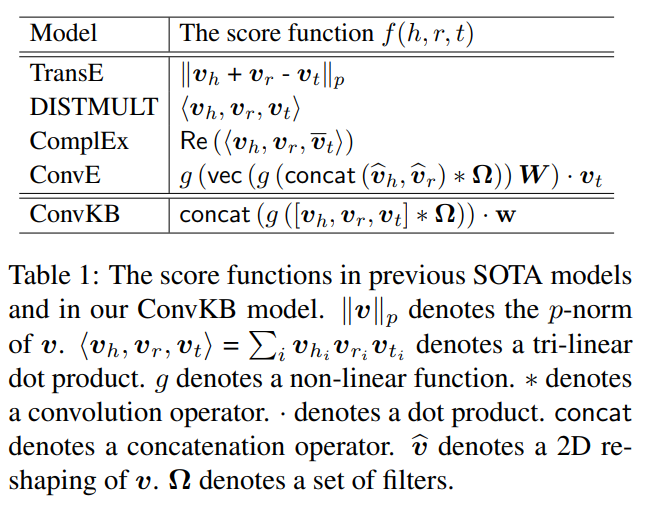

In [1]:
from IPython.display import Image
Image(filename='../images/convkb_t1.png')

In this paper, we present ConvKB—an embedding model which proposes a novel use of CNN for the KB completion task. In ConvKB, each entity or relation is associated with an unique k-dimensional embedding. Let $v_h, v_r$ and $v_t$ denote k-dimensional embeddings of $h, r$ and $t$, respectively. For each triple $(h, r, t)$, the corresponding triple of k-dimensional embeddings $(vh, vr, vt)$ is represented as a $k × 3$ input matrix. This input matrix is fed to the convolution layer where different filters of the same  $1 × 3$ to extract the global relationships among same dimensional entities of the embedding triple. That is, these filters are repeatedly operated over every row of the input matrix to produce different feature maps. The feature maps are concatenated into a single feature vector which is then computed with a weight vector via a dot product to produce a score for the triple $(h, r, t)$. This score is used to infer whether the triple $(h, r, t)$ is valid or not.

Trong bài báo này, chúng tôi trình bày ConvKB một mô hình nhúng trong đó đề xuất sử dụng CNN mới cho nhiệm vụ hoàn thành KB. Trong ConvKB, mỗi thực thể hoặc quan hệ được liên kết với một nhúng kdimensional duy nhất. Gọi $v_h, v_r$ và $v_t$ lần lượt là các nhúng nhúng k chiều của $h, r$ và $t$. Đối với mỗi bộ ba $(h, r, t)$, bộ ba tương ứng k của các chiều nhúng $(vh, vr, vt)$ được biểu diễn dưới dạng ma trận đầu vào $k × 3$. Ma trận đầu vào này được đưa đến convolution layer(lớp chập) trong đó các bộ lọc khác nhau có cùng hình dạng $1 × 3$ được sử dụng để trích xuất các mối quan hệ toàn cầu giữa các mục nhập cùng chiều của bộ ba nhúng. Nghĩa là, các bộ lọc này được vận hành lặp đi lặp lại trên mỗi hàng của ma trận đầu vào để tạo ra các bản đồ tính năng khác nhau. Các bản đồ đặc trưng được nối vào một vectơ đặc trưng sau đó được tính toán với một vectơ trọng lượng thông qua một sản phẩm chấm để tạo ra điểm số cho bộ ba $(h, r, t)$. Điểm này được sử dụng để suy ra liệu bộ ba $(h, r, t)$ có hợp lệ hay không.

Our contributions in this paper are as follows:

* We introduce ConvKB—a novel embedding model of entities and relationships for knowledge base completion. ConvKB models the relationships among same dimensional entries of the embeddings. This implies that ConvKB generalizes transitional characteristics in transition-based embedding models.

* We evaluate ConvKB on two benchmark datasets: WN18RR (Dettmers et al., 2018) and FB15k-237 (Toutanova and Chen, 2015). Experimental results show that ConvKB obtains better link prediction performance than previous SOTA embedding models. In particular, ConvKB obtains the best mean rank and the highest Hits@10 on WN18RR, and produces the highest mean reciprocal rank and highest Hits@10 on FB15k-237.

Đóng góp của chúng tôi ở paper này như sau :

* Chúng tôi giới thiệu ConvKB một mô hình nhúng mới của các thực thể và các mối quan hệ để hoàn thành cơ sở tri thức. ConvKB mô hình các mối quan hệ giữa các mục cùng chiều của các nhúng. Điều này ngụ ý rằng ConvKB khái quát các đặc tính chuyển tiếp trong các mô hình nhúng dựa trên quá trình chuyển đổi.

* Chúng tôi đánh giá ConvKB trên hai bộ dữ liệu điểm chuẩn: WN18RR (Dettmers et al., 2018) và FB15k-237 (Toutanova và Chen, 2015). Kết quả thử nghiệm cho thấy ConvKB có được hiệu suất dự đoán liên kết tốt hơn so với các mô hình nhúng SOTA trước đây. Cụ thể, ConvKB có được thứ hạng trung bình tốt nhất và Số lần truy cập cao nhất @ 10 trên WN18RR và tạo ra thứ hạng đối ứng trung bình cao nhất và Số lần truy cập cao nhất @ 10 trên FB15k-237

## 2 Proposed ConvKB model

A knowledge base $\mathcal{G}$ is a collection of valid factual triples in the form of (head entity, relation,
tail entity) denoted as $(h, r, t)$ such that $h, t ∈ \mathcal{E}$ and $r ∈ \mathcal{R}$ where $\mathcal{E}$ is a set of entities and $\mathcal{R}$ is a set of relations. Embedding models aim to define a score function f giving an implausibility score for each triple $(h, r, t)$ such that valid triples receive lower scores than invalid triples. Table 1 presents score functions in previous SOTA models

Cơ sở tri thức G là tập hợp các bộ ba thực tế hợp lệ ở dạng (thực thể đầu, quan hệ, thực thể đuôi) được ký hiệu là (h, r, t) sao cho h, t ∈ E và r ∈ R trong đó E là một tập hợp thực thể và R là một tập hợp các quan hệ. Các mô hình nhúng nhằm xác định hàm điểm f cho điểm số khả thi cho mỗi bộ ba (h, r, t) sao cho bộ ba hợp lệ nhận được điểm thấp hơn bộ ba không hợp lệ. Bảng 1 trình bày các hàm điểm trong các mô hình SOTA trước đó.

We denote the dimensionality of embeddings by $k$ such that each embedding triple $(v_h, v_r, v_t)$ are viewed as a matrix $\boldsymbol{A} = [v_h, v_r, v_t] ∈ \mathbb{R}^{k×3}$ . And $\boldsymbol{A}_{i,:} ∈ R^{1×3}$ denotes the i-th row of $\boldsymbol{A}$. Suppose that we use a filter $ω ∈ \mathbb{R}^{1×3}$ operated on the convolution layer. $ω$ is not only aimed to examine the global relationships between same dimensional entries of the embedding triple $(v_h, v_r, v_t)$, but also to generalize the transitional characteristics in the transition-based models. $ω$ is repeatedly operated over every row of $\boldsymbol{A}$ to finally generate a feature map $v = [v1, v2, ..., v_k] ∈ \mathbb{R}^k$ as:

$$ v_i = g(ω \cdot \boldsymbol{A}_{i,:} + b) $$

where $b ∈ \mathbb{R}$ is a bias term and $g$ is some activation
function such as ReLU.


Chúng tôi biểu thị tính chiều của các nhúng bằng k sao cho mỗi bộ ba nhúng $(v_h, v_r, v_t)$ được xem dưới dạng ma trận $\boldsymbol{A} = [v_h, v_r, v_t] ∈ \mathbb{R}^{k×3}$ Và $\boldsymbol{A}_{i,:} ∈ R^{1×3}$ biểu thị hàng thứ i của $\boldsymbol{A}$. Giả sử rằng chúng ta sử dụng bộ lọc $ω ∈ \mathbb{R}^{1×3}$ hoạt động trên lớp chập. không chỉ nhằm mục đích kiểm tra các mối quan hệ toàn cầu giữa các mục cùng chiều của bộ ba nhúng $(v_h, v_r, v_t)$, mà còn để khái quát các đặc tính chuyển tiếp trong các mô hình dựa trên quá trình chuyển đổi. được vận hành lặp đi lặp lại trên mỗi hàng của A để cuối cùng tạo ra một bản đồ đặc trưng $v = [v1, v2, ..., v_k] ∈ \mathbb{R}^k$ như :

$$ v_i = g(ω \cdot \boldsymbol{A}_{i,:} + b) $$

 trong đó b R là một thuật ngữ thiên vị và g là một số chức năng kích hoạt như ReLU .

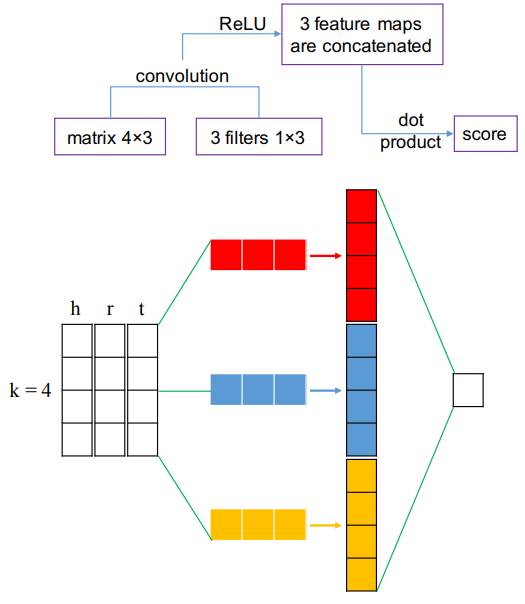

In [2]:
Image(filename='../images/convkb_f1.png')

Our ConvKB uses different filters $∈ \mathbb{R}^{1×3}$ to generate different feature maps. Let $Ω$ and $τ$ denote the set of filters and the number of filters, respectively, i.e. $τ = |Ω|$, resulting in $τ$ feature maps. These $τ$ feature maps are concatenated into a single vector $∈ \mathbb{R}^{τk×1}$ which is then computed with a weight vector $w ∈ \mathbb{R}^{τk×1}$ via a dot product to give a score for the triple $(h, r, t)$. Figure 1 illustrates the computation process in ConvKB.
Formally, we define the ConvKB score function f as follows:

$$ f(h, r, t) = concat(g([v_h, v_r, v_t] * \Omega)) \cdot w $$

where $Ω$ and $w$ are shared parameters, independent of $h, r$ and $t$; $∗$ denotes a convolution operator; and concat denotes a concatenation operator

If we only use one filter $ω$ (i.e. using $τ = 1$) with a fixed bias term $b = 0$ and the activation function $g(x) = |x|$ or $g(x) = x^2$ , and fix$ω = [1, 1, −1]$ and $w = 1$ during training, ConvKB reduces to the plain TransE model (Bordes et al., 2013). So our ConvKB model can be viewed as an extension of TransE to further model global relationships.

We use the Adam optimizer (Kingma and Ba,2014) to train ConvKB by minimizing the loss function $\mathcal{L}$ (Trouillon et al., 2016) with L2 regularization on the weight vector $w$ of the model:

$$
\begin{align*}
\mathcal{L}=\sum_{(h, r, t)\in\{\mathcal{G}\cup\mathcal{G}'\}} log(1 + exp(l_{h, r, t}\cdot f(h, r, t))) \\
+ \frac{\lambda}{2}\| W \|_2^2
\end{align*}$$

in which, $l_{h, r, t} =
\begin{cases}
1&\text{for }(h, r, t) \in \mathcal{G}\\
-1&\text{for }(h, r, t) \in \mathcal{G}'
\end{cases} $


here $\mathcal{G}'$ is a collection of invalid triples generated by corrupting valid triples in $\mathcal{G}$

ConvKB của chúng tôi sử dụng các bộ lọc khác nhau $∈ \mathbb{R}^{1×3}$ để tạo các bản đồ tính năng khác nhau. Đặt $Ω$ và $τ$ lần lượt là tập hợp các bộ lọc và số lượng bộ lọc, tức là $τ = |Ω|$, dẫn đến $τ$ bản đồ tính năng. Các bản đồ đặc trưng này được ghép thành một vectơ duy nhất $∈ \mathbb{R}^{τk×1}$, sau đó được tính toán với một vectơ trọng số $w ∈ \mathbb{R}^{τk×1}$ thông qua một sản phẩm chấm để cho điểm cho bộ ba $(h, r, t)$. Hình 1 minh họa quá trình tính toán trong ConvKB.

Formally, we define the ConvKB score function $f$ as follows:

$$ f(h, r, t) = concat(g([v_h, v_r, v_t] * \Omega)) \cdot w $$

where $Ω$ and $w$ are shared parameters, independent of $h, r$ and $t$; $∗$ denotes a convolution operator; and concat denotes a concatenation operator

If we only use one filter $ω$ (i.e. using $τ = 1$) with a fixed bias term $b = 0$ and the activation function $g(x) = |x|$ or $g(x) = x^2$ , and fix$ω = [1, 1, −1]$ and $w = 1$ during training, ConvKB reduces to the plain TransE model (Bordes et al., 2013). So our ConvKB model can be viewed as an extension of TransE to further model global relationships.

Chúng tôi sử dụng hàm tối ưu Adam (Kingma and Ba,2014) để huấn luyện ConvKB bằng cách tối thiểu hóa (minimizing) hàm mất mát $\mathcal{L}$ (Trouillon et al., 2016)  với L2 regularization (chính qui) trên trọng số vector $w$ của mô hình:

$$
\begin{align*}
\mathcal{L}=\sum_{(h, r, t)\in\{\mathcal{G}\cup\mathcal{G}'\}} log(1 + exp(l_{h, r, t}\cdot f(h, r, t))) \\
+ \frac{\lambda}{2}\| W \|_2^2
\end{align*}$$

trong đó, $l_{h, r, t} =
\begin{cases}
1&\text{cho }(h, r, t) \in \mathcal{G}\\
-1&\text{cho }(h, r, t) \in \mathcal{G}'
\end{cases} $


ở đây $\mathcal{G}'$ là một tập hợp bộ ba không hợp lệ phát sinh bởi bộ ba hỏng trong $\mathcal{G}$

## 3 Experiment

### 3.1 Dataset

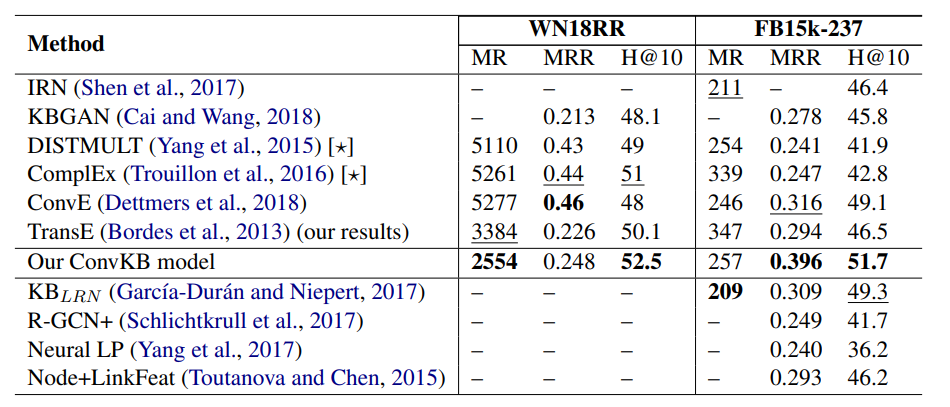

In [4]:
Image(filename='../images/convkb_t3.png')

Table 3: Experimental results on WN18RR and FB15k-237 test sets. MRR and H@10 denote the mean reciprocal
rank and Hits@10 (in %), respectively. [?]: Results are taken from Dettmers et al. (2018) where Hits@10 and MRR
are rounded to 2 decimal places on WN18RR. The last 4 rows report results of models that exploit information
about relation paths (KBLRN , R-GCN+ and Neural LP) or textual mentions derived from a large external corpus
(Node+LinkFeat). The best score is in **bold**, while the second best score is in <ins>underline</ins>

We evaluate ConvKB on two benchmark datasets:
WN18RR (Dettmers et al., 2018) and FB15k237 (Toutanova and Chen, 2015). WN18RR and FB15k-237 are correspondingly subsets of two
common datasets WN18 and FB15k (Bordes et al., 2013). As noted by Toutanova and Chen (2015), WN18 and FB15k are easy because they contain many reversible relations. So knowing relations are reversible allows us to easily predict the majority of test triples, e.g. state-of-the-art results on both WN18 and FB15k are obtained by using a simple reversal rule as shown in Dettmers
et al. (2018). Therefore, WN18RR and FB15k237 are created to not suffer from this reversible relation problem in WN18 and FB15k, for which the knowledge base completion task is more realistic. Table 2 presents the statistics of WN18RR and FB15k-23


Chúng tôi đánh giá ConvKB trên hai bộ dữ liệu điểm chuẩn: WN18RR (Dettmers et al., 2018) và FB15k237 (Toutanova và Chen, 2015). WN18RR và FB15k-237 là các tập hợp con tương ứng của hai bộ dữ liệu phổ biến WN18 và FB15k (Bordes et al., 2013). Theo ghi nhận của Toutanova và Chen (2015), WN18 và FB15k rất dễ dàng vì chúng chứa nhiều mối quan hệ thuận nghịch. Vì vậy, biết các mối quan hệ có thể đảo ngược cho phép chúng ta dễ dàng dự đoán phần lớn các bộ ba thử nghiệm, ví dụ: Kết quả tiên tiến trên cả WN18 và FB15k đều thu được bằng cách sử dụng quy tắc đảo ngược đơn giản như thể hiện trong Dettmers et al. (2018). Do đó, WN18RR và FB15k237 được tạo ra để không gặp phải vấn đề quan hệ thuận nghịch này trong WN18 và FB15k, trong đó nhiệm vụ hoàn thành cơ sở tri thức là thực tế hơn. Bảng 2 trình bày số liệu thống kê của WN18RR và FB15k-23

### 3.2 Evaluation protocol
In the KB completion or link prediction task (Bordes et al., 2013), the purpose is to predict a missing entity given a relation and another entity, i.e, inferring $h$ given $(r, t)$ or inferring $t$ given $(h, r)$. The results are calculated based on ranking the scores produced by the score function $f$ on test triples.


Trong nhiệm vụ dự đoán liên kết hoặc hoàn thành KB (Bordes et al., 2013), mục đích là để dự đoán một thực thể bị thiếu đưa ra một mối quan hệ và một thực thể khác, tức là suy ra $h$ đưa ra $(r, t)$ hoặc suy ra $t$ từ $(h, r )$. Các kết quả được tính dựa trên xếp hạng điểm số được tạo bởi hàm điểm $f$ trên bộ ba bài kiểm tra

Following Bordes et al. (2013), for each valid test triple $(h, r, t)$, we replace either $h$ or $t$ by each of other entities in $\mathcal{E}$ to create a set of corrupted triples. We use the “Filtered” setting protocol (Bordes et al., 2013), i.e., not taking any corrupted triples that appear in the KB into accounts. We rank the valid test triple and corrupted triples in ascending order of their scores. We employ three common evaluation metrics: mean rank (MR), mean reciprocal rank (MRR), and Hits@10 (i.e., the proportion of the valid test triples ranking in top 10 predictions). Lower MR, higher MRR or higher Hits@10 indicate better performance.


Theo Bordes et al. (2013), với mỗi bộ ba kiểm tra hợp lệ (h, r, t), chúng tôi thay thế h hoặc t bằng từng thực thể khác trong E để tạo một bộ ba bộ ba bị hỏng. Chúng tôi sử dụng giao thức cài đặt của Bộ lọc được lọc (Bordes et al., 2013), tức là không lấy bất kỳ bộ ba bị hỏng nào xuất hiện trong KB vào tài khoản. Chúng tôi xếp hạng ba bài kiểm tra hợp lệ và bộ ba bị hỏng theo thứ tự tăng dần của điểm số của họ. Chúng tôi sử dụng ba số liệu đánh giá phổ biến: thứ hạng trung bình (MR), thứ hạng đối ứng trung bình (MRR) và Số lần truy cập @ 10 (tức là tỷ lệ của xếp hạng ba lần kiểm tra hợp lệ trong 10 dự đoán hàng đầu). MR thấp hơn, MRR cao hơn hoặc Số lần truy cập cao hơn @ 10 cho thấy hiệu suất tốt hơn.

### 3.3 Training protocol

We use the common Bernoulli trick (Wang et al., 2014; Lin et al., 2015b) to generate the head or
tail entities when sampling invalid triples. We also use entity and relation embeddings produced by TransE to initialize entity and relation embeddings in ConvKB. We employ a TransE implementation available at: https://github.com/datquocnguyen/STransE. We train TransE using a grid search of hyper-parameters: the dimensionality of embeddings $k ∈ {50, 100}$, SGD learning rate

    Chúng tôi sử dụng trick Bernoulli phổ biến (Wang et al., 2014; Lin et al., 2015b) để generate head hoặc tail entities khi lấy mẫu invalid triples. Chúng tôi cũng sử dụng entity và relation embeddings được tạo ra bởi TransE để khởi tạo entity và relation embeddings trong ConvKB. Chúng tôi cài đặt một phiên bản cài đặt của TransE ở : https://github.com/datquocnguyen/STransE. Chúng tôi train TransE sử dụng grid search của siêu tham số : chiều nhúng $k ∈ {50, 100}$, SGD learning rate $∈ \{1e^{−4} , 5e^{−4} , 1e^{−3} , 5e^{−3}\}$ $\approx \{0.0001, 0.0005, 0.001, 0.005\}$, $l_1$-norm or $l_2$-norm

### 3.4 Main experimental results

## 4 Conclusion